# Syllabus

Differentiate between discrete and continuous data types in the context of bootstrapping
(Unterscheiden Sie zwischen diskreten und kontinuierlichen Datentypen im Zusammenhang mit Bootstrapping)

## <u>Beispiel für Bootstrapping mit diskreten Daten:</u>

Angenommen, du hast die Anzahl von Kunden pro Tag über fünf Tage:

```python
kunden = [10, 15, 8, 12, 20]
```



## Ziel:

Schätze den Mittelwert und die Unsicherheit (Standardfehler) mithilfe von Bootstrapping

## Schritte:

1. Originaler Mittelwert: `(10 + 15 + 8 + 12 + 20)/5 = 13`
2. Bootstrap-Stichproben: Wiederholtes Ziehen von Stichproben mit Zurücklegen z.B:
    - Stichprobe 1: `[15,12,8,15,10]` -> Mittelwert = <font color='red'>12</font>
    - Stichprobe 2: `[20,8,10,20,15]` -> Mittelwert = <font color='red'>14.6</font>


3. Unsicherheit: Ziehe z.B. 1000 Bootstrap-Stichproben, berechne die Mittelwerte und das 95% Konfidenzintervall. Siehe Code Beispiel

## Code:

Mittelwert: 12.9218
95%-Konfidenzintervall: [ 9.6 17. ]


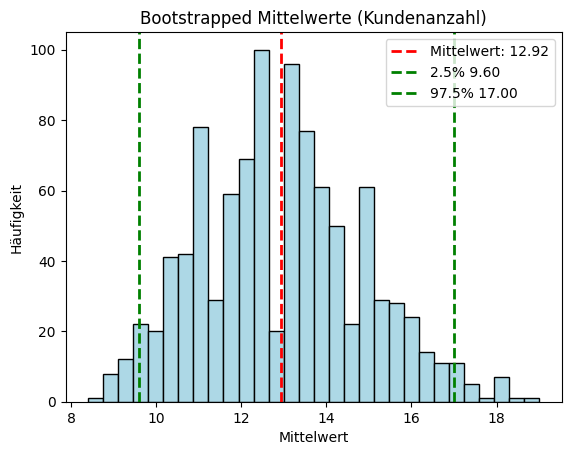

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Daten: Kundenanzahl an 5 Tagen
kunden = [10, 15, 8, 12, 20]
n_iterations = 1000

# Bootstrapping: Ziehen von Stichproben und Berechnen der Mittelwerte
bootstrapped_means = [np.mean(np.random.choice(kunden, len(kunden), replace=True)) for _ in range(n_iterations)]

# Mittelwert und Konfidenzintervall berechnen
mean_estimate = np.mean(bootstrapped_means)
conf_interval = np.percentile(bootstrapped_means, [2.5, 97.5])

# Ausgabe der Ergebnisse
print(f"Mittelwert: {mean_estimate}")
print(f"95%-Konfidenzintervall: {conf_interval}")

# Erstellen eines Hitsogramms der Bootstrapped-Mittelwerte

# Erstellt das Historgramm mit 30 Bins
plt.hist(bootstrapped_means,bins=30,color='lightblue',edgecolor='black') 

#Zeichnet eine gestrichelte rote Linie für den Mittelwert
plt.axvline(mean_estimate, color='red',linestyle='dashed',linewidth=2,label=f'Mittelwert: {mean_estimate:.2f}')

# Zeichnet eine gestrichelte grüne Linie für das untere 2.5%-Perzentil
plt.axvline(conf_interval[0],color='green',linestyle='dashed',linewidth=2,label=f'2.5% {conf_interval[0]:.2f}')

#Zeichnet eine gestrichelte grüne Line für das obere 97.5%-Perzentil
plt.axvline(conf_interval[1],color='green',linestyle='dashed',linewidth=2,label=f'97.5% {conf_interval[1]:.2f}')

#Titel und Achsenbeschriftungen
plt.title('Bootstrapped Mittelwerte (Kundenanzahl)')
plt.xlabel('Mittelwert')
plt.ylabel('Häufigkeit')
# Legende hinzufügen
plt.legend()
plt.show()


## <u>Beispiel für Bootstrapping mit kontinuierlichen Daten:</u>

Angenommen, du hast die Größen von 5 Personen gemessen(in cm)

````Python
groeßen = [170.5,165.2,180.1,172.8,169,3]
````

## Ziel:

Schätze den Mittelwert der Größen und die Unsicherheit(Standardfehler) mithilfe von Bootstrapping.

## Schritte:

1. Originaler Mittelwert: `(170.5,165.2,180.1,172.8,169.3)/5 = 171.58`

2. Bootstrap-Stichproben: Wiederholtes Ziehen von Stichproben mit Zurücklegen, z.B:

   Stichprobe 1: `[170.5,165.2,172.8,180.1,170.5]` -> Mittelwert = <font color='red'>171.82</font>

   Stichprobe 2: `[169.3,170.5,165.2,169.3,165.2]` -> Mittelwert = <font color = 'red'>167.9</font>
   


3. Unsicherheit: Ziehe z.B 1000 Bootstrap-Stichproben, berechne die Mittelwerte und das 95%- Konfidenzintervall.

## Code:

Mittelwert: 171.52947999999998
95%-Konfidenzintervall: [167.66 176.02]


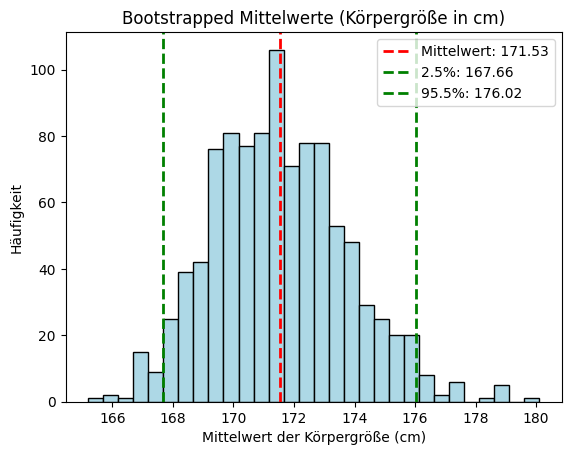

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Kontinuierliche Daten: Höhen in cm
groessen = [170.5, 165.2, 180.1, 172.8, 169.3]
n_iterations = 1000

# Bootstrapping: Wiederholtes Ziehen von Stichproben mit Zurücklegen
bootstrapped_means = [np.mean(np.random.choice(groessen, len(groessen), replace=True)) for _ in range(n_iterations)]

# Mittelwert und Konfidenzintervalle
mean_estimate = np.mean(bootstrapped_means)
conf_interval = np.percentile(bootstrapped_means, [2.5, 97.5])

# Ausgabe der Ergebnisse
print(f"Mittelwert: {mean_estimate}")
print(f"95%-Konfidenzintervall: {conf_interval}")

# Erstellen eines Histogramms der Bootstrapped-Mittelwerte

#Erstellt das Histogramm der Mittelwerte mit 30 Bins
plt.hist(bootstrapped_means,bins=30,color='lightblue',edgecolor='black')

#Rote gestrichelte Linie für den geschätzten Mittelwert
plt.axvline(mean_estimate, color='red', linestyle='dashed', linewidth=2, label= f'Mittelwert: {mean_estimate:.2f}')

#Grüne gestrichelte Linie für das 2.5%-Perzentil
plt.axvline(conf_interval[0], color='green', linestyle='dashed', linewidth=2, label= f'2.5%: {conf_interval[0]:.2f}')

#Grüne gestrichelte Line für das 97,5%-Perzentil
plt.axvline(conf_interval[1], color='green', linestyle='dashed', linewidth=2, label= f'95.5%: {conf_interval[1]:.2f}')

#Titel und Achsenbeschriftungen
#Setzt den Titel des Diagramms
plt.title('Bootstrapped Mittelwerte (Körpergröße in cm)')

#Beschreibt die x-Achse mit 'Mittelwert der Körpergröße (cm)'
plt.xlabel('Mittelwert der Körpergröße (cm)')

#Beschriftet die y-Achse mit 'Häufigket'
plt.ylabel('Häufigkeit')

#Legende hinzufügen
plt.legend() # Zeigt die Legende an, um die Bedeutung der Linien zu erklären

#Diagramm anzeigen
plt.show()
